In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt
from IPython import display # If using IPython, Colab or Jupyter
import numpy as np

11493376/11490434 [==============================] - 0s 0us/step


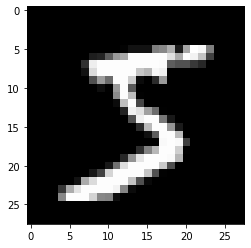

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0
# Plot image data from x_train
plt.imshow(x_train[0], cmap = "gray")
plt.show()

In [ ]:
LATENT_SIZE = 2
encoder = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(64),
    LR(),
    Dropout(0.5),
    Dense(LATENT_SIZE, activation="linear"),
])

In [ ]:
decoder = Sequential([
    Dense(64, input_shape = (LATENT_SIZE,)),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(784),
    Activation("sigmoid"),
    Reshape((28, 28))
])

In [ ]:
img = Input(shape = (28, 28))
latent_vector = encoder(img)
output = decoder(latent_vector)
model = Model(inputs = img, outputs = output)
model.compile("nadam", loss = "binary_crossentropy")

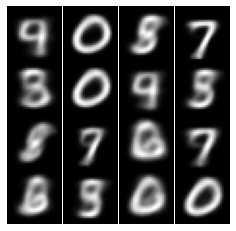

----------- EPOCH 9 -----------
938/938 [==============================] - 25s 27ms/step - loss: 0.2127


In [ ]:
EPOCHS = 45
#Only do plotting if you have IPython, Jupyter, or using Colab
for epoch in range(EPOCHS):
    fig, axs = plt.subplots(4, 4, figsize=(4,4))
    rand = x_test[np.random.randint(0, 10000, 16)].reshape((4, 4, 1, 28, 28))
    
    display.clear_output() # If you imported display from IPython
    
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(model.predict(rand[i, j])[0], cmap = "gray")
            axs[i, j].axis("off")
    
    plt.subplots_adjust(wspace = 0, hspace = 0)
    plt.show()
    print("-----------", "EPOCH", epoch, "-----------")
    model.fit(x_train, x_train, batch_size = 64)

In [ ]:
print("as you can see, the numbers are well reconstructed")

as you can see, the numbers are well reconstructed


In [ ]:
print("the error for the first picture is : ", np.sum(np.abs(model.predict(x_train[0].reshape(1,28,28)).reshape(28,28) - x_train[0])))

the error for the first picture is :  99.52172758602106


In [ ]:
from tqdm import tqdm
dots = []
for each in tqdm(x_train):
  q = encoder(each.reshape(1,28,28))
  dots.append(q.numpy())

100%|██████████| 60000/60000 [02:56<00:00, 340.19it/s]


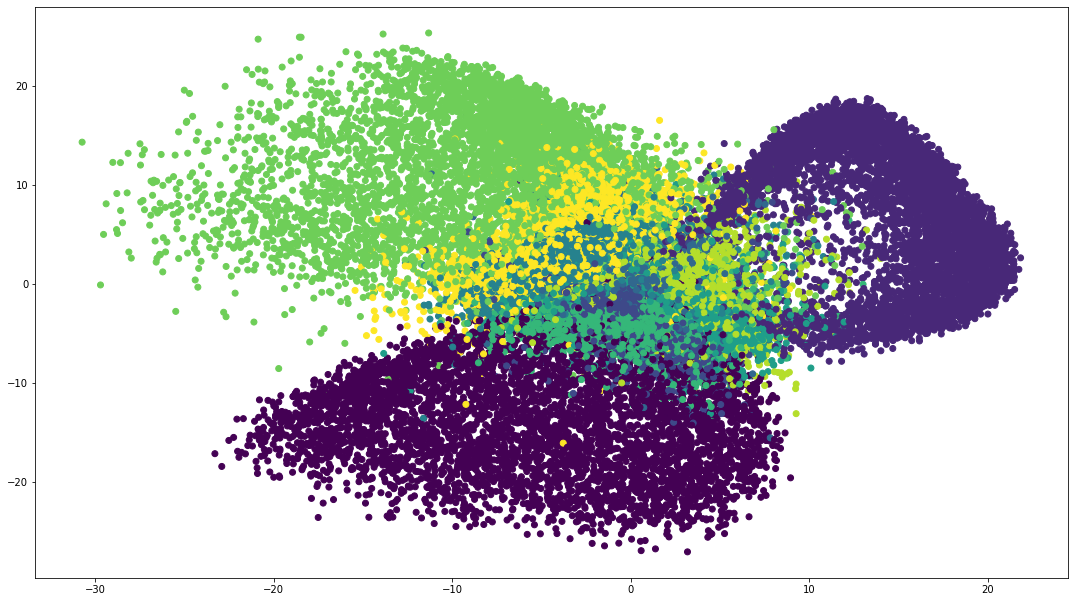

In [ ]:
dots = np.array(dots).reshape(-1,2)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.scatter(dots[:,0], dots[:,1],c = y_train)
plt.show()

In [ ]:
print("final error")

error = 0
for i in tqdm(range(len(x_train))):
  error += np.sum(np.abs(model.predict(x_train[i].reshape(1,28,28)).reshape(28,28) - x_train[i]))

print("\n so the final error is : ", error)

  0%|          | 3/60000 [00:00<44:32, 22.45it/s]

final error


100%|██████████| 60000/60000 [41:04<00:00, 24.35it/s]


 so the final error is :  5376447.209277656
